In [3]:
import findspark
findspark.init()
import pyspark
#import pandas as pd
#import urllib
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
#caminho_arquivo = "file:///Users/alexa/Desktop/spark/focos48h_AMS.csv"
caminho_arquivo = "focos48h_AMS.csv"
#CSV_URL = 'http://www.inpe.br/queimadas/dados-abertos/download/?id=focos_brasil&time=Ontem'
#CSV_URL = 'http://www.inpe.br/queimadas/dados-abertos/download/?utm_campaign=dados-abertos&utm_medium=landing-page&time=48h&utm_content=focos_ams_48h&id=focos_ams&utm_source=landing-page'
df = spark.read.csv(caminho_arquivo,header=True, inferSchema=True)
#df = spark.read.csv(CSV_URL,header=True, inferSchema=True)
#urllib.request.urlretrieve(CSV_URL, 'focos48h_AMS.csv')
#df = pd.read_csv('dfocos48h_AMS.csv')
df.show(5)
df.count()
df.printSchema()

+--------------------+---------+--------+-------------------+--------+--------------------+------------------+---------+--------------------+
|                 FID|longitude|latitude|      data_hora_gmt|satelite|           municipio|            estado|     pais|                geom|
+--------------------+---------+--------+-------------------+--------+--------------------+------------------+---------+--------------------+
|focos_ams_ontem_h...|   -58.83| -26.577|2019-07-08 17:40:00|AQUA_M-T|Libertador Genera...|             Chaco|Argentina|POINT (-26.577 -5...|
|focos_ams_ontem_h...|   -61.39| -23.244|2019-07-08 17:40:00|AQUA_M-T|Doctor Pedro P. Peña|          Boquerón| Paraguay|POINT (-23.244 -6...|
|focos_ams_ontem_h...|  -57.587| -22.065|2019-07-08 17:40:00|AQUA_M-T|      PORTO MURTINHO|MATO GROSSO DO SUL|   Brasil|POINT (-22.065 -5...|
|focos_ams_ontem_h...|  -56.548| -24.025|2019-07-08 17:40:00|AQUA_M-T|                Lima|         San Pedro| Paraguay|POINT (-24.025 -5...|
|focos

In [4]:
df_agregado = df.groupBy('pais').agg({'data_hora_gmt': 'count'}).show()

+---------+--------------------+
|     pais|count(data_hora_gmt)|
+---------+--------------------+
| Paraguay|                 257|
|   Guyana|                   1|
|Argentina|                 250|
|     Peru|                   8|
|  Bolivia|                 161|
|Venezuela|                   4|
|  Uruguay|                  11|
|   Brasil|                 290|
| Colombia|                   3|
+---------+--------------------+



In [5]:
df2 = df[df['pais'] == 'Brasil']
#df_agregado = df2.groupBy('estado').agg({'data_hora_gmt': 'count'}).show()
df_agregado = df2.groupBy('estado').count()
df_agregado.show()

+------------------+-----+
|            estado|count|
+------------------+-----+
| RIO GRANDE DO SUL|   37|
|       MATO GROSSO|   91|
|             GOIÁS|    1|
|          AMAZONAS|   12|
|          RONDÔNIA|   26|
|          MARANHÃO|   15|
|    SANTA CATARINA|    6|
|      MINAS GERAIS|   25|
|            PARANÁ|   13|
|              ACRE|    5|
|MATO GROSSO DO SUL|   32|
|             BAHIA|    2|
|              PARÁ|   11|
|         TOCANTINS|   13|
|             CEARÁ|    1|
+------------------+-----+



(-1.1089966545690013,
 1.1019534955603993,
 -1.1021684185671607,
 1.1054351728008127)

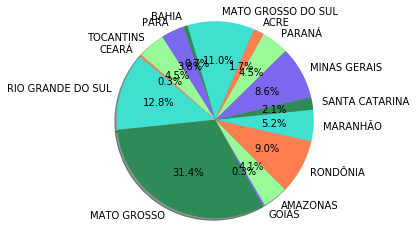

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

dfpandas = df_agregado.select("*").toPandas()
labels = dfpandas['estado']
sizes = dfpandas['count']
colors = ['turquoise', 'seagreen', 'mediumslateblue', 'palegreen', 'coral']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, shadow=True, startangle=140)
plt.axis('equal')
#plt.legend()

In [7]:
df = df[['latitude','longitude']]
df.printSchema()
df.show(5)
df.count()

root
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)

+--------+---------+
|latitude|longitude|
+--------+---------+
| -26.577|   -58.83|
| -23.244|   -61.39|
| -22.065|  -57.587|
| -24.025|  -56.548|
| -22.102|  -60.013|
+--------+---------+
only showing top 5 rows



985

In [8]:
#import numpy as np
#import pandas as pd
# ativa transfencia de dados colunados via Arrow
#spark.conf.set("spark.sql.execution.arrow.enabled", "true")
dfpandas = df.select("*").toPandas()

In [9]:
import gmaps
#import gmaps.datasets
gmaps.configure(api_key="AIza...")
figure_layout = { 'width': '100%', 'height': '500px', 'border': '1px solid black', 'padding': '1px'} 
mapa = gmaps.figure(map_type='HYBRID',layout=figure_layout)  
mapa.add_layer(gmaps.heatmap_layer(dfpandas))
mapa

Figure(layout=FigureLayout(border='1px solid black', height='500px', padding='1px', width='100%'))